In [1]:
%load_ext autoreload
%autoreload 2 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/tmp/ipykernel_16669/575932552.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
import ct_datasets

In [109]:
a={}

In [110]:
a.update(csv.iloc[0])

In [115]:
# for i, row in csv.iterrows():
#     print(row)

[autoreload of ct_datasets failed: Traceback (most recent call last):
  File "/home/users/joecohen/.local/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/users/joecohen/.local/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/share/software/user/open/python/3.9.0/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 786, in exec_module
  File "<frozen importlib._bootstrap_external>", line 923, in get_code
  File "<frozen importlib._bootstrap_external>", line 853, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/users/joecohen/workspace/ct-counterfactuals/ct_datasets.py", line 17
    for i, row in self.raw_csv.i

In [4]:
path = "/home/users/joecohen/group/joecohen/Totalsegmentator_dataset/"

In [5]:
csv = pd.read_csv(path + 'meta.csv', delimiter=';')

In [63]:
csv

,image_id,age,gender,institute,study_type,split
0,s0000,32,f,H,ct pelvis,val
1,s0001,59,f,H,ct abdomen-pelvis,train
2,s0002,49,f,H,ct thorax-neck,train
3,s0003,51,f,H,ct spine,train
4,s0004,72,f,C,ct thorax-abdomen-pelvis,train
...,...,...,...,...,...,...
1199,s1400,67,m,H,ct angiography thorax-abdomen-pelvis,train
1200,s1401,49,f,H,ct angiography abdomen-pelvis,train
1201,s1403,59,m,H,ct angiography abdomen-pelvis,train
1202,s1404,61,f,H,ct angiography thorax-abdomen-pelvis,train


In [10]:
import nibabel as nib

In [90]:
sizes = []
for image_id in tqdm(csv.image_id):
    g = nib.load(path + image_id + "/ct.nii.gz")
    meta = {
        'image_id': image_id,
        'frame': list(range(g.shape[2])),
        'frame_height':g.shape[0],
        'frame_width': g.shape[1],
    }
    meta.update(dict(g.header))
    sizes.append(meta)
    #print(image_id, g.shape, g.get_data_dtype())

  0%|          | 0/1204 [00:00<?, ?it/s]

In [91]:
df = pd.DataFrame(sizes)

In [94]:
df = df.explode('frame')

In [95]:
len(df)

312791

In [96]:
df

,image_id,frame,frame_height,frame_width,sizeof_hdr,data_type,db_name,extents,session_error,regular,...,quatern_c,quatern_d,qoffset_x,qoffset_y,qoffset_z,srow_x,srow_y,srow_z,intent_name,magic
0,s0000,0,294,192,348,b'',b'',0,0,b'',...,0.0,-0.15948671,-251.3474,82.563995,93.09277,"[1.4236406, 0.47218123, 0.0, -251.3474]","[-0.47249055, 1.4237434, 0.0, 82.563995]","[0.0, 0.0, 1.5, 93.09277]",b'',b'n+1'
0,s0000,1,294,192,348,b'',b'',0,0,b'',...,0.0,-0.15948671,-251.3474,82.563995,93.09277,"[1.4236406, 0.47218123, 0.0, -251.3474]","[-0.47249055, 1.4237434, 0.0, 82.563995]","[0.0, 0.0, 1.5, 93.09277]",b'',b'n+1'
0,s0000,2,294,192,348,b'',b'',0,0,b'',...,0.0,-0.15948671,-251.3474,82.563995,93.09277,"[1.4236406, 0.47218123, 0.0, -251.3474]","[-0.47249055, 1.4237434, 0.0, 82.563995]","[0.0, 0.0, 1.5, 93.09277]",b'',b'n+1'
0,s0000,3,294,192,348,b'',b'',0,0,b'',...,0.0,-0.15948671,-251.3474,82.563995,93.09277,"[1.4236406, 0.47218123, 0.0, -251.3474]","[-0.47249055, 1.4237434, 0.0, 82.563995]","[0.0, 0.0, 1.5, 93.09277]",b'',b'n+1'
0,s0000,4,294,192,348,b'',b'',0,0,b'',...,0.0,-0.15948671,-251.3474,82.563995,93.09277,"[1.4236406, 0.47218123, 0.0, -251.3474]","[-0.47249055, 1.4237434, 0.0, 82.563995]","[0.0, 0.0, 1.5, 93.09277]",b'',b'n+1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,s1405,282,255,255,348,b'',b'',0,0,b'',...,0.0,0.0,-185.62695,-57.126953,30.6,"[1.5, 0.0, 0.0, -185.62695]","[0.0, 1.5, 0.0, -57.126953]","[0.0, 0.0, 1.5, 30.6]",b'',b'n+1'
1203,s1405,283,255,255,348,b'',b'',0,0,b'',...,0.0,0.0,-185.62695,-57.126953,30.6,"[1.5, 0.0, 0.0, -185.62695]","[0.0, 1.5, 0.0, -57.126953]","[0.0, 0.0, 1.5, 30.6]",b'',b'n+1'
1203,s1405,284,255,255,348,b'',b'',0,0,b'',...,0.0,0.0,-185.62695,-57.126953,30.6,"[1.5, 0.0, 0.0, -185.62695]","[0.0, 1.5, 0.0, -57.126953]","[0.0, 0.0, 1.5, 30.6]",b'',b'n+1'
1203,s1405,285,255,255,348,b'',b'',0,0,b'',...,0.0,0.0,-185.62695,-57.126953,30.6,"[1.5, 0.0, 0.0, -185.62695]","[0.0, 1.5, 0.0, -57.126953]","[0.0, 0.0, 1.5, 30.6]",b'',b'n+1'


In [100]:
df['frame_height'].min()

47

In [99]:
df['frame_width'].min()

48

In [86]:
g = nib.load(path + "s0001/ct.nii.gz")

In [87]:
#g.get_fdata()

In [88]:
img = g.get_fdata()

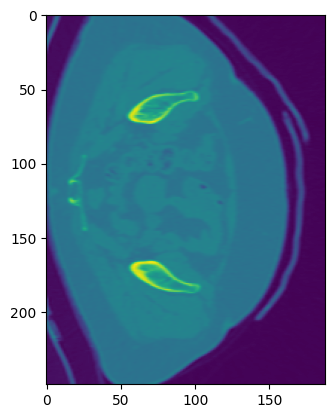

In [89]:
plt.imshow(img[:,:,50]);

In [119]:
d = ct_datasets.TotalSegmenter_Dataset(path)

  0%|          | 0/1204 [00:00<?, ?it/s]

In [60]:
#d.csv

In [120]:
a = d[1000]
a.shape

(255, 177)

In [121]:
#d.csv.iloc[1000]

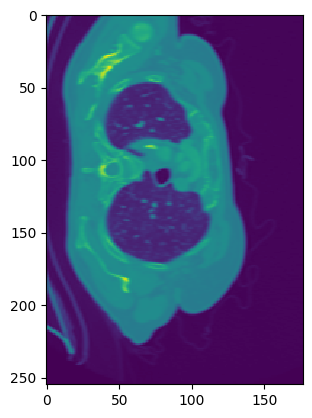

In [124]:
plt.imshow(a, interpolation='none');